# Dependencies

In [ ]:
# pip install lime


In [ ]:
!pip install -q optuna


In [1]:
!git clone https://github.com/Foysal87/bn_nlp.git


Cloning into 'bn_nlp'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 107 (delta 2), reused 0 (delta 0), pack-reused 101 (from 1)
Receiving objects: 100% (107/107), 7.00 MiB | 11.60 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
!cd bn_nlp


In [ ]:
 !pip install -q -U bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 54.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 48.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.1 MB/s eta 0:00:00


In [ ]:
!pip install -q bangla_stemmer

In [ ]:
# !gdown 1y6R4r2azEusl4bLyussZcZvo3-wI3dCn

In [ ]:
# !pip install fasttext

In [6]:
import sklearn
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bnlp import BasicTokenizer
from bnlp import SentencepieceTokenizer
from bnlp import BengaliWord2Vec
from bnlp import NLTKTokenizer
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import precision_recall_fscore_support


In [7]:
df = pd.read_csv("/kaggle/input/bdshs/train.csv")


In [54]:
df.head(20)

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
5,অই কখানকি সত্যি বলতে কি জানছ তরে জুদি পাইতাম ত...,female,callToViolence,1
6,অই জারছি পরা লোক টা কে পাইলে কোত্তার মতো পিটাইতাম,ind,callToViolence,1
7,অকে পিথিবির আলো দেখানোর আগেই মেরে ফেলা দরকার ছিল,ind,callToViolence,1
8,অকে মেরে ফেলতে হবে,ind,callToViolence,1
9,অগরে চুদে মেয়ে গূলোকে,group,callToViolence,1


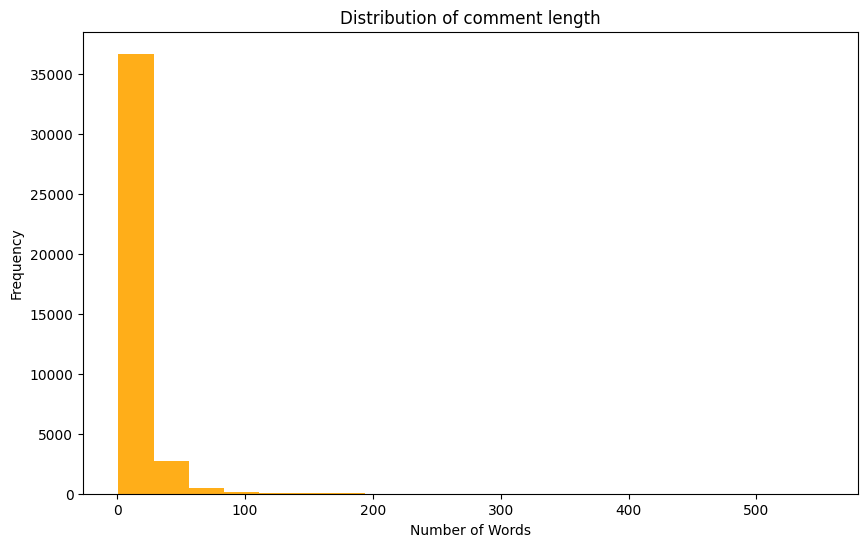

In [8]:
word_counts = df['sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, color='orange', alpha=0.9)
plt.title('Distribution of comment length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

<Axes: xlabel='hate speech', ylabel='count'>

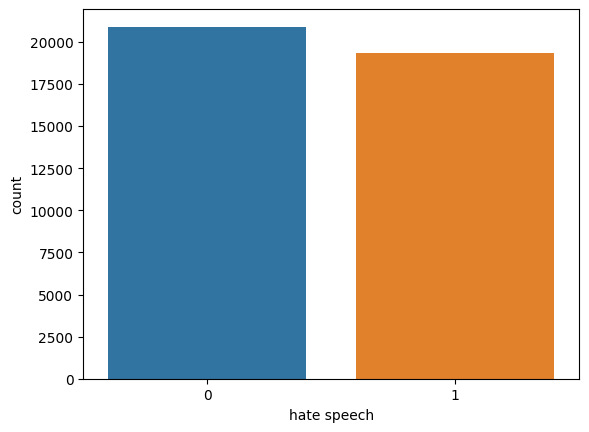

In [9]:
sns.countplot(data=df, x='hate speech')

# Cleaning

In [10]:
def clean_text(text):
    # Emoji removal pattern covering various emoji ranges
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove English characters & numbers
    text = re.sub(r'[A-Za-z0-9]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove punctuation
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]০১২৩৪৫৬৭৮৯', '', text)
    punctuations = '''`|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    # Create a character class to remove specified characters
    regex_pattern = '[' + re.escape(punctuations) + ']'
    text = re.sub(regex_pattern, '', text)


    return text



In [11]:
df['sentence'] = df['sentence'].apply(clean_text)


In [15]:
df.head(20)

,sentence,target,type,hate speech
0,ঐ ইন্দুর তোই মরছ নাই,ind,callToViolence,1
1,গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আমি...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি,ind,callToViolence,1
3,কোটির চোদা খাওয়া শেষে এখন কোটির চোদা খাবে মিথিলা,female,callToViolence,1
4,য় মীর জাফরের মুখে মুতে দে,male,callToViolence,1
5,অই কখানকি সত্যি বলতে কি জানছ তরে জুদি পাইতাম ত...,female,callToViolence,1
6,অই জারছি পরা লোক টা কে পাইলে কোত্তার মতো পিটাইতাম,ind,callToViolence,1
7,অকে পিথিবির আলো দেখানোর আগেই মেরে ফেলা দরকার ছিল,ind,callToViolence,1
8,অকে মেরে ফেলতে হবে,ind,callToViolence,1
9,অগরে চুদে মেয়ে গূলোকে,group,callToViolence,1


# Tokenization with bnlp library

In [14]:
basic_tokenizer = BasicTokenizer()

df['sentence'] = df['sentence'].apply(basic_tokenizer.tokenize)

In [59]:
df.head(10)

,sentence,target,type,hate speech
0,"[ইন্দুর, তোই, মরছ]",ind,callToViolence,1
1,"[গেবনের, শেষে, আইসা, মুখোশ, টা, খুলছে, এতেই, ম...",ind,callToViolence,1
2,"[মুরগি, চোরের, পাছায়, ডুকবি, মারবি]",ind,callToViolence,1
3,"[কোটির, চোদা, খাওয়া, শেষে, কোটির, চোদা, খাবে, ...",female,callToViolence,1
4,"[য়, মীর, জাফরের, মুখে, মুতে, দে]",male,callToViolence,1
5,"[অই, কখানকি, সত্যি, জানছ, তরে, জুদি, পাইতাম, ত...",female,callToViolence,1
6,"[অই, জারছি, পরা, লোক, টা, পাইলে, কোত্তার, পিটা...",ind,callToViolence,1
7,"[অকে, পিথিবির, আলো, দেখানোর, মেরে, ফেলা, দরকার]",ind,callToViolence,1
8,"[অকে, মেরে, ফেলতে]",ind,callToViolence,1
9,"[অগরে, চুদে, মেয়ে, গূলোকে]",group,callToViolence,1


# Remove stopwords with bn_nlp repository

In [12]:
from bn_nlp.preprocessing import ban_processing

# Define the processor
bp = ban_processing()

# Apply the stop word removal on the dataset
df['sentence'] = df['sentence'].apply(lambda x: bp.stop_word_remove(x))



In [15]:
df.head(10)

,sentence,target,type,hate speech
0,"[ইন্দুর, তোই, মরছ]",ind,callToViolence,1
1,"[গেবনের, শেষে, আইসা, মুখোশ, টা, খুলছে, এতেই, ম...",ind,callToViolence,1
2,"[মুরগি, চোরের, পাছায়, ডুকবি, মারবি]",ind,callToViolence,1
3,"[কোটির, চোদা, খাওয়া, শেষে, কোটির, চোদা, খাবে, ...",female,callToViolence,1
4,"[য়, মীর, জাফরের, মুখে, মুতে, দে]",male,callToViolence,1
5,"[অই, কখানকি, সত্যি, জানছ, তরে, জুদি, পাইতাম, ত...",female,callToViolence,1
6,"[অই, জারছি, পরা, লোক, টা, পাইলে, কোত্তার, পিটা...",ind,callToViolence,1
7,"[অকে, পিথিবির, আলো, দেখানোর, মেরে, ফেলা, দরকার]",ind,callToViolence,1
8,"[অকে, মেরে, ফেলতে]",ind,callToViolence,1
9,"[অগরে, চুদে, মেয়ে, গূলোকে]",group,callToViolence,1


# Stemming

In [62]:

wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [ ]:
from bangla_stemmer.stemmer import stemmer
# Initialize the BanglaStemmer
stmr = stemmer.BanglaStemmer()

# Function to apply stemming (lemmatization) to a list of tokens
def lemmatize_tokens(tokens):
    return stmr.stem(tokens)

# Assuming your dataset is in 'df' with tokenized sentences in 'sentence' column
# Apply lemmatization to the tokenized text
df['lemmatized_sentence'] = df['sentence'].apply(lemmatize_tokens)




In [18]:
# Verify the result
print(df[['sentence', 'lemmatized_sentence']].head(10))

                                            sentence  \
0                                 [ইন্দুর, তোই, মরছ]   
1  [গেবনের, শেষে, আইসা, মুখোশ, টা, খুলছে, এতেই, ম...   
2                [মুরগি, চোরের, পাছায়, ডুকবি, মারবি]   
3  [কোটির, চোদা, খাওয়া, শেষে, কোটির, চোদা, খাবে, ...   
4                   [য়, মীর, জাফরের, মুখে, মুতে, দে]   
5  [অই, কখানকি, সত্যি, জানছ, তরে, জুদি, পাইতাম, ত...   
6  [অই, জারছি, পরা, লোক, টা, পাইলে, কোত্তার, পিটা...   
7    [অকে, পিথিবির, আলো, দেখানোর, মেরে, ফেলা, দরকার]   
8                                 [অকে, মেরে, ফেলতে]   
9                        [অগরে, চুদে, মেয়ে, গূলোকে]   

                                 lemmatized_sentence  
0                                  [ইন্দুর, তোই, মর]  
1  [গেবন, শাষ, আইসা, মুখোশ, টা, খুল, এতে, মহাখুশী...  
2                  [মুরগি, চোর, পাছায়, ডুকবি, মারবি]  
3  [কোটি, চোদা, খাওয়া, শাষ, কোটি, চোদা, খাবে, মিথ...  
4                      [য়, মীর, জাফর, মুখে, মুত, দে]  
5  [অই, কখানকি, সত্যি, জান, তরে, জুদি, পাইতাম, তর... 

In [20]:
df['sentence'] = df['lemmatized_sentence']

In [22]:
df.to_csv('ctsl_data.csv', index=False)


In [21]:
df['sentence'].head(10)

0                                    [ইন্দুর, তোই, মর]
1    [গেবন, শাষ, আইসা, মুখোশ, টা, খুল, এতে, মহাখুশী...
2                    [মুরগি, চোর, পাছায়, ডুকবি, মারবি]
3    [কোটি, চোদা, খাওয়া, শাষ, কোটি, চোদা, খাবে, মিথ...
4                        [য়, মীর, জাফর, মুখে, মুত, দে]
5    [অই, কখানকি, সত্যি, জান, তরে, জুদি, পাইতাম, তর...
6     [অই, জারছি, পর, লোক, টা, পাইলে, কোত্ত, পিটাইতাম]
7          [অক, পিথিবির, আলো, দেখানোর, মার, ফেলা, দরক]
8                                       [অক, মার, ফেল]
9                            [অগরে, চুদে, মেয়ে, গূলো]
Name: sentence, dtype: object

In [70]:
df = df.drop(columns=['target','type', 'lemmatized_sentence'])

# Describe Dataset

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40224 entries, 0 to 40223
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     40224 non-null  object
 1   hate speech  40224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 628.6+ KB


In [72]:
df.head()

,sentence,hate speech
0,"[ইন্দুর, তোই, মর]",1
1,"[গেবন, শাষ, আইসা, মুখোশ, টা, খুল, এতে, মহাখুশী...",1
2,"[মুরগি, চোর, পাছায়, ডুকবি, মারবি]",1
3,"[কোটি, চোদা, খাওয়া, শাষ, কোটি, চোদা, খাবে, মিথ...",1
4,"[য়, মীর, জাফর, মুখে, মুত, দে]",1


In [73]:
df.isnull().sum()

sentence       0
hate speech    0
dtype: int64

<Axes: xlabel='hate speech', ylabel='count'>

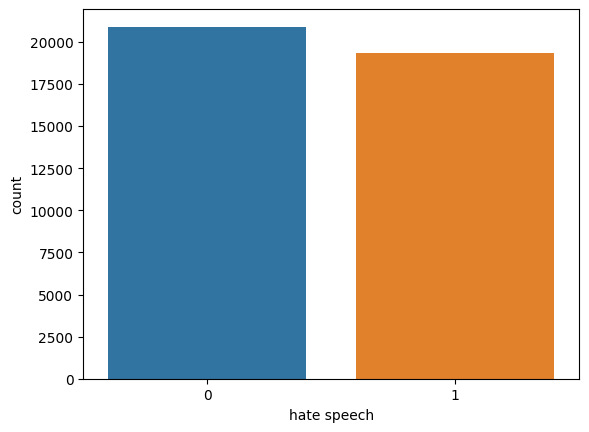

In [74]:
sns.countplot(data=df, x='hate speech')

In [ ]:
print(df['sentence'].iloc[2],"\n")
print(df['sentence'].iloc[4],"\n")

In [75]:
word_counts = df['sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, color='orange', alpha=0.9)
plt.title('Distribution of comment length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

AttributeError: 'list' object has no attribute 'split'

# Remove empty tokenized if any

In [76]:
import ast

def clean_df(df, col):
    def is_empty_list(x):
        try:
            return isinstance(ast.literal_eval(x), list) and not ast.literal_eval(x)
        except (ValueError, SyntaxError, TypeError):
            return False

    return df[~df[col].apply(lambda x: is_empty_list(x) if isinstance(x, str) else False)].copy()

In [77]:
df = df[df['sentence'].astype(str).str.contains(r'\[\]', na=False) == False].reset_index()


In [ ]:
pf = df.copy()
pf

Tf-idf

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df['sentence'] = df['sentence'].apply(lambda x: ' '.join(x))  # Join tokens into a single string

# Apply TfidfVectorizer with unigram and bigram
tfidf_bigram = TfidfVectorizer(ngram_range=(1, 2), use_idf=True, tokenizer=lambda x: x.split())

# Apply TF-IDF to the joined (space-separated) text data
x_tfidf_bigram = tfidf_bigram.fit_transform(df['sentence'])

# If you have labels in 'hate speech' column
X_train, X_test, y_train, y_test = train_test_split(x_tfidf_bigram, df['hate speech'], test_size=0.2, random_state=42)


Evaluator

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
def evaluate_model(model, X_test, y_test):
    # Model type display
    print(70*'-')
    print(f"Evaluating model: {model.__class__.__name__}")
    
    # Predict the results
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve (class 1 probabilities)

    # Compute accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    print(70*'-')


Train & evaluate

random forest

----------------------------------------------------------------------
Evaluating model: RandomForestClassifier
Accuracy: 0.8652
Precision: 0.9118
Recall: 0.7969
F1 Score: 0.8505


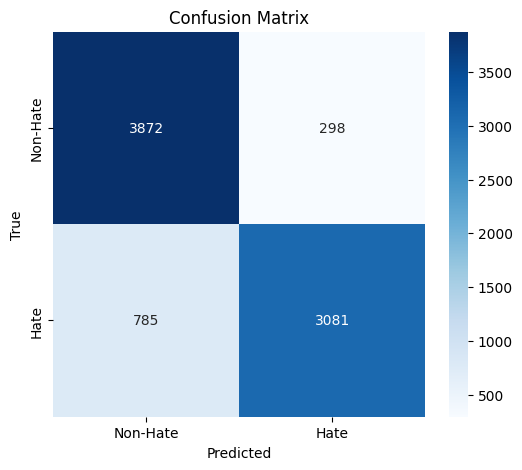

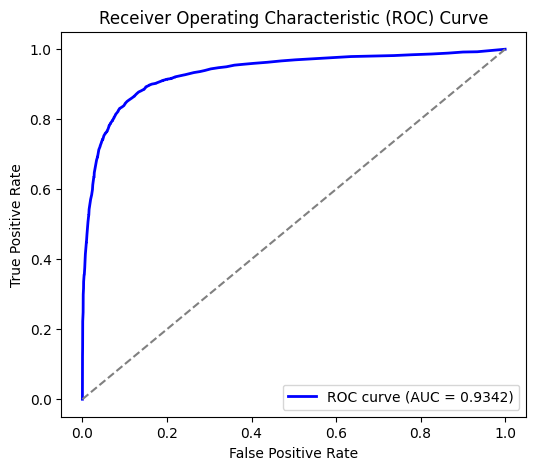

----------------------------------------------------------------------


In [81]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
evaluate_model(model_rf, X_test, y_test)

logistic regression

----------------------------------------------------------------------
Evaluating model: LogisticRegression
Accuracy: 0.8484
Precision: 0.9209
Recall: 0.7494
F1 Score: 0.8263


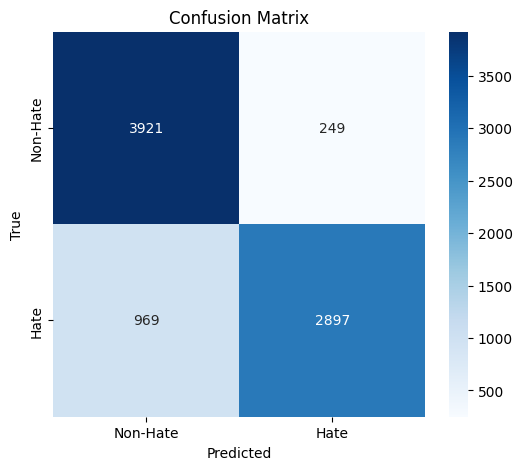

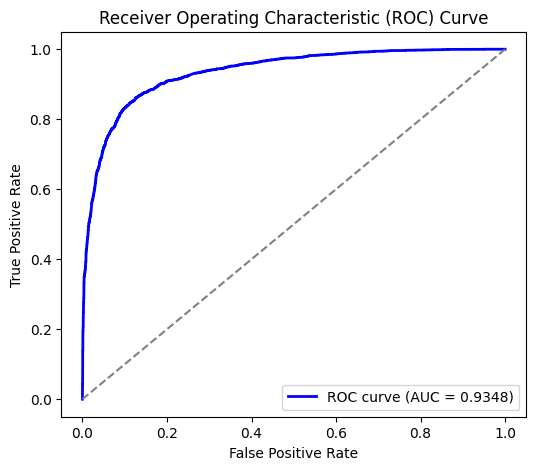

----------------------------------------------------------------------


In [82]:
model_lr = LogisticRegression(penalty='l2',random_state=0)
model_lr.fit(X_train, y_train)
evaluate_model(model_lr, X_test, y_test)

knn

----------------------------------------------------------------------
Evaluating model: KNeighborsClassifier
Accuracy: 0.7800
Precision: 0.8175
Recall: 0.6987
F1 Score: 0.7534


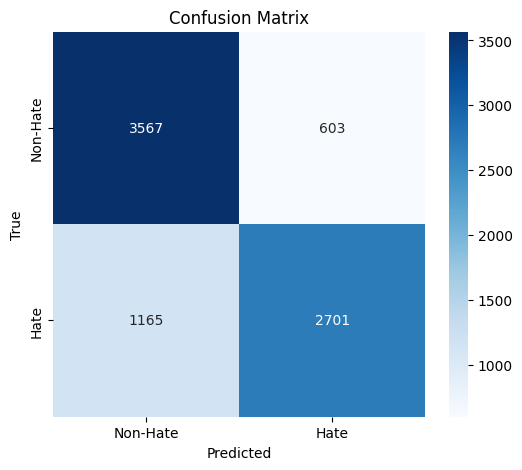

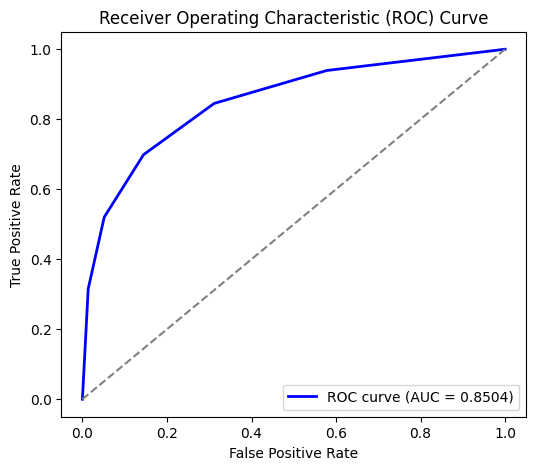

----------------------------------------------------------------------


In [83]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model_knn.fit(X_train, y_train)
evaluate_model(model_knn, X_test, y_test)

svm

In [ ]:
model_sv = SVC(kernel='linear', random_state=42, probability=True)
model_sv.fit(X_train, y_train)
evaluate_model(model_sv, X_test, y_test)